# Data Visualisation to Answer Hypotheses

## Objectives

* To use Seaborn and Plotly to analyse the df_transformed and answer my questions/ hypotheses

## Inputs

* The input file is df_transformed.csv which was created at the end of ETL and saved in 'Dataset/Processed'

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [22]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\sonia'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [18]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [19]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\sonia'

In [23]:
import os
os.chdir(r"c:\Users\sonia\Documents\VS Studio Projects\Chronic_Kidney_Disease")

# Visualisation of New Columns

First, I will import the required libraries.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Next, I will load my new DataFrame and rename it 'df'.

In [24]:
import os
os.path.exists("Dataset/Processed/df_transformed.csv")

True

In [25]:
df = pd.read_csv("Dataset/Processed/df_transformed.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,ModRiskFactors,NomodRiskFactors,PreviousInjury,HealthManagement
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,0,1,1.018824,4.966808,9.871449,1,10.864927,30,0,24.293941
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,0,0,3.923538,8.189275,7.161765,1,13.924068,50,0,18.177576
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,1,1,1.429906,7.624028,7.354632,1,14.222586,15,0,30.557317
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,0,0,3.226416,3.282688,6.629587,1,12.635402,25,0,13.256926
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,0,1,0.285466,3.849498,1.437385,1,14.955607,35,0,24.392890


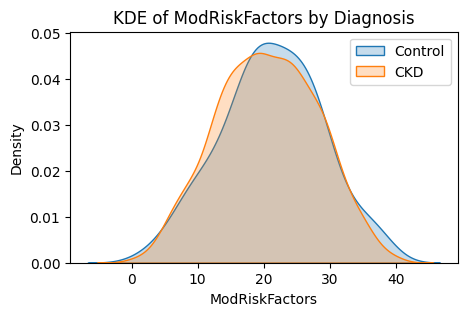

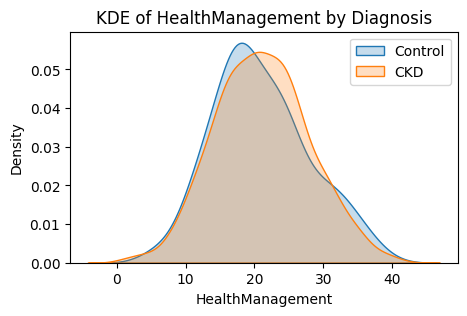

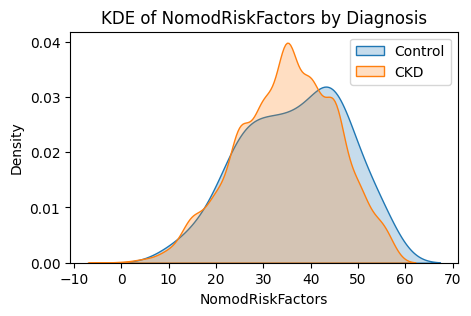

In [ ]:
for col in df[['ModRiskFactors', 'HealthManagement', 'NomodRiskFactors']]:
    plt.figure(figsize=(5,3))
    sns.kdeplot(data=df[df['Diagnosis']==0], x=col, label='Control', fill=True)
    sns.kdeplot(data=df[df['Diagnosis']==1], x=col, label='CKD', fill=True)

    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'KDE of {col} by Diagnosis')
    plt.legend()
    plt.show()

Note, for these 3 factors, the higher the score, the more beneficial or preventative. I can see that there is very little difference between the distributions of CKD and control patients in 'ModRiskFactors'and 'HealthManagement'. 

For 'NomodRiskFactors', the peak distribution for CKD patients is lower (~35) compared to control patients (~45), however, the shapes are very different and transformations to approach a normal distribution are needed to make sound comparisons. I'm not going to do this because I don't think the effect of this factor is too critical to spend the time at this point.  


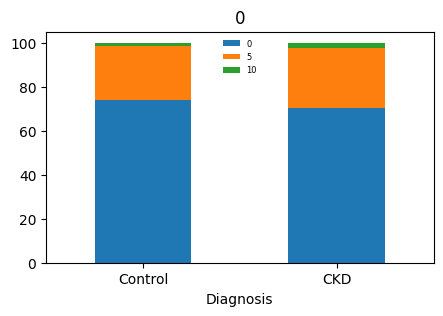

In [ ]:
(
df.groupby(['Diagnosis', 'PreviousInjury'])
.size()
.unstack()
.apply(lambda x: x / x.sum() * 100, axis=1)
.plot(kind='bar', stacked=True, figsize=(5, 3))
    )

plt.legend(fontsize=6, loc='upper center', framealpha=0)
plt.title(f'{col}')
plt.gca().set_xticklabels(['Control', 'CKD'])
plt.xticks(fontsize=10, rotation=0)
plt.show()

Note, for 'PreviousInjury', the higher the score, the more dentrimental the effect. This plot also strongly suggests that previous injury to the urinary system is not a major determinant in CKD.

Overall, after considering multiple types of environmental factors, I believe the data strongly suggests that, in this population, environmental factors, whether modifiable or not, do not strongly separate CKD patients from controls.

# Hypothesis 1 - markers of Metabolic Syndrome are also risk factors for CKD

The 5 main markers of Metabolic Syndrome are shown below along with the clinical marker variable in the dataset
- abdominal obesity - 'BMI'
- hypertriglyceridemia - 'CholesterolTriglycerides'
- reduced High-Density Lipoprotein (HDL) cholesterol - 'CholesterolHDL' and 'CholesterolTotal'
- hypertension - 'SystolicBP' and 'DiastolicBP'
- hyperglycemia - 'FastingBloodSugar' and 'HbA1c'

Note, BMI is not a good measure of abdominal obesity, but it is the closest marker the dataset provides so I will have a look, with caution. 

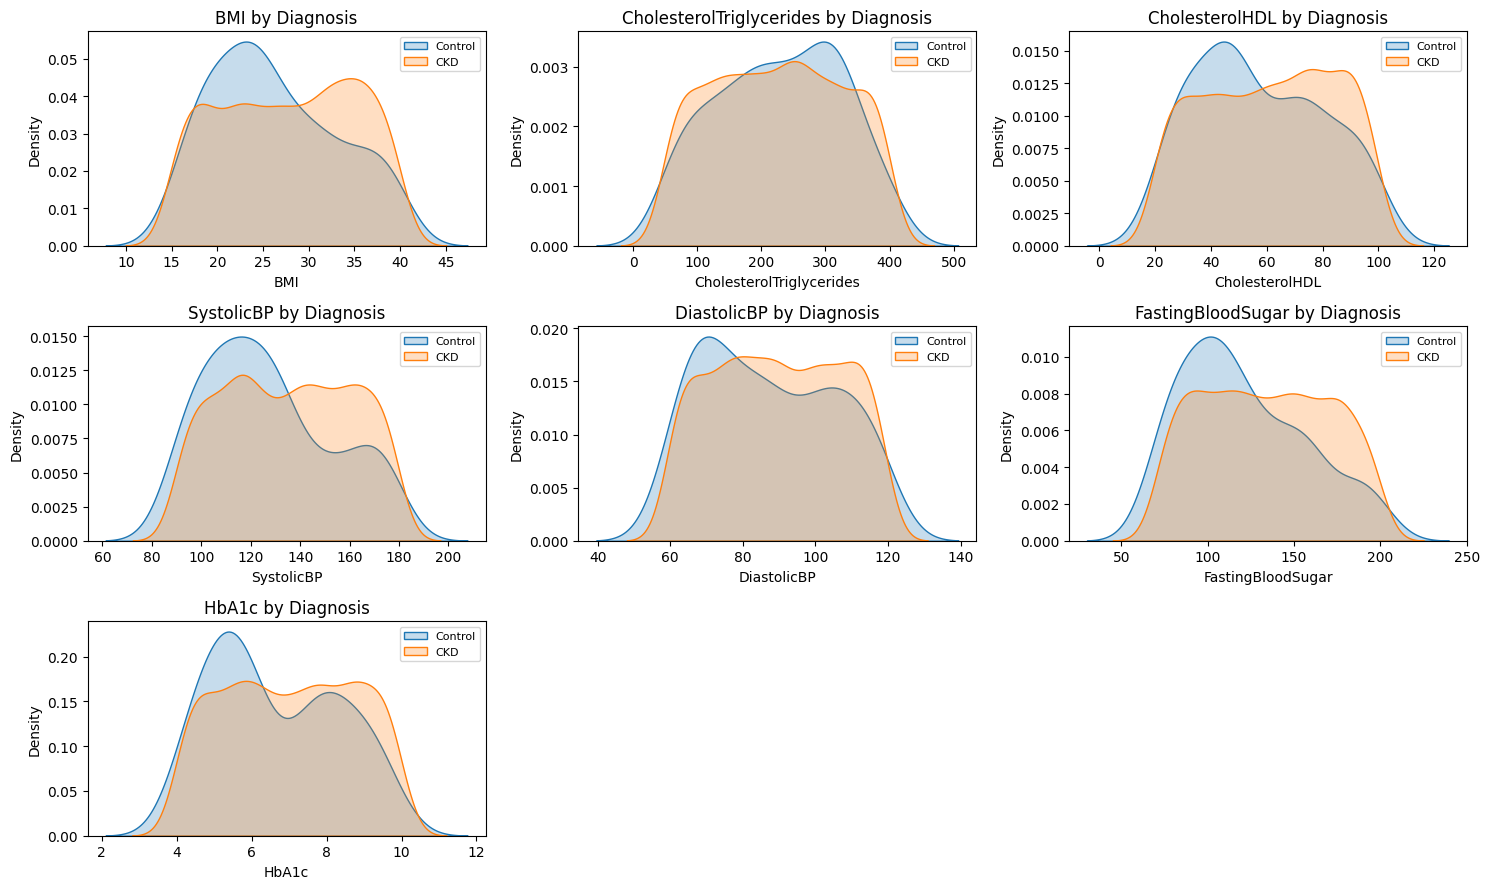

In [ ]:
import math

cols_to_plot = [
    'BMI', 'CholesterolTriglycerides', 'CholesterolHDL', 
    'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c'
]

# Grid layout
n_cols = 3  # number of plots across
n_rows = math.ceil(len(cols_to_plot) / n_cols)  # number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 3))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(cols_to_plot):
    sns.kdeplot(data=df[df['Diagnosis'] == 0], x=col, label='Control', fill=True, ax=axes[i])
    sns.kdeplot(data=df[df['Diagnosis'] == 1], x=col, label='CKD', fill=True, ax=axes[i])
    axes[i].set_title(f'{col} by Diagnosis')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    axes[i].legend(fontsize=8)

# Remove empty plots if any
for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



These results show that  BMI, higher systolic BP and increased fasting blood glucose may be associated with a subset of CKD patients. The other factors, I would say, are not, in this population. Of interest, there appears to be about 50 % of CKD patients who have higher HDL cholesterol levels than control, and none have significantly less. 

Next, I am also going to look for correlations between linked variables.

First, I'm going to show a scatter plot of 'SystolicBP' vs 'DiastolicBP', grouped by 'Diagnosis'.

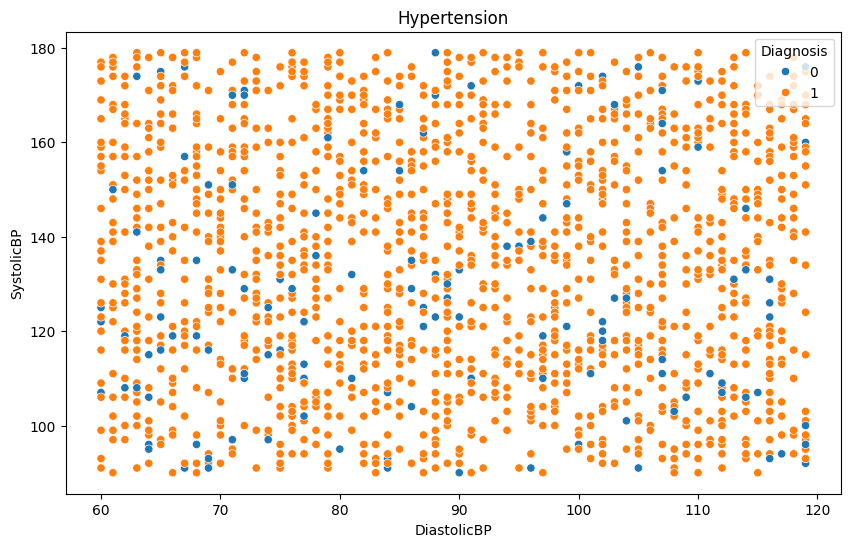

In [ ]:
fig, axes = plt.subplots(figsize=(10,6))
sns.scatterplot(data=df, x='DiastolicBP', y='SystolicBP', hue='Diagnosis')
plt.title("Hypertension")
plt.show()

This plot shows that diastolic and systolic blood pressure are not correlated in this population, which is quite surprising.

Next, I will show a scatter plot of 'FastingBloodSugar' vs. 'HbA1c', grouped by 'Diagnosis'.

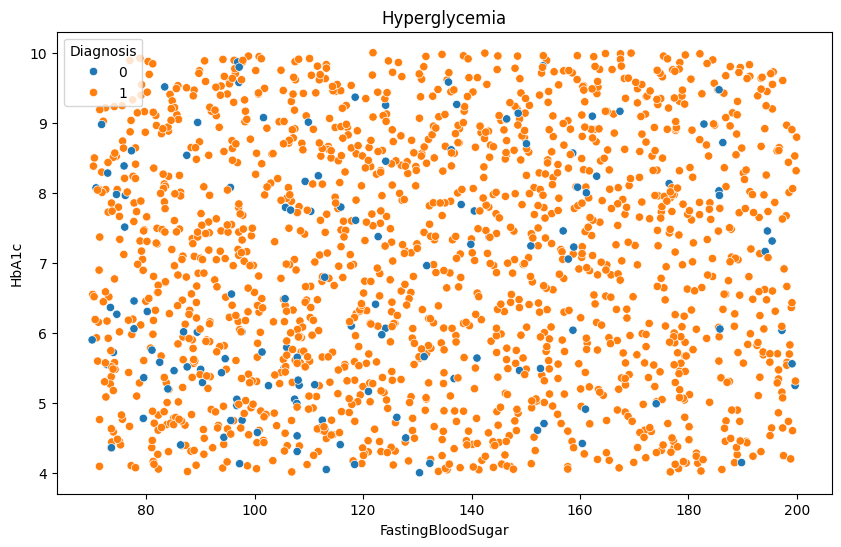

In [ ]:
fig, axes = plt.subplots(figsize=(10,6))
sns.scatterplot(data=df, x='FastingBloodSugar', y='HbA1c', hue='Diagnosis')
plt.title("Hyperglycemia")
plt.show()


Fasting blood sugar and Hb1Ac are not correlated in this population. This is quite surprising as they are both measures of glucose in the blood.

Next, I will show a scatter plot of 'CholesterolHDL' vs 'CholesterolTotal' grouped by 'Diagnosis'.

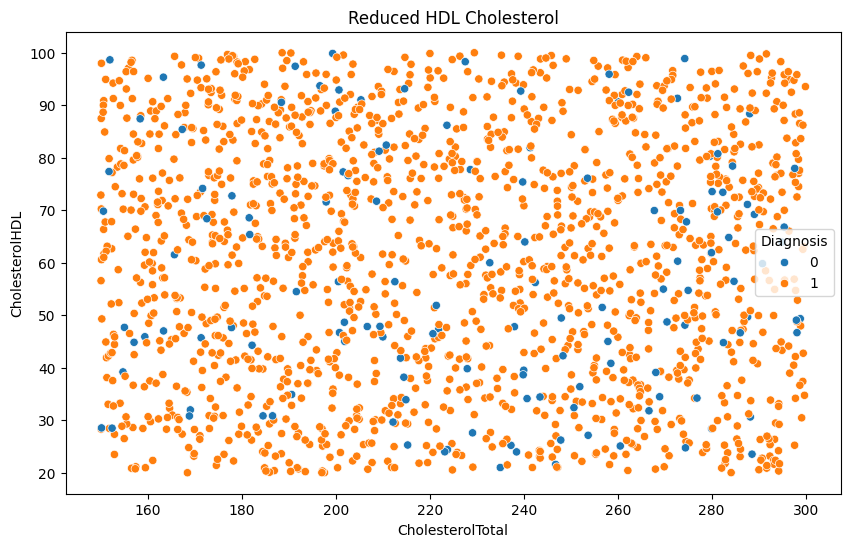

In [ ]:
fig, axes = plt.subplots(figsize=(10,6))
sns.scatterplot(data=df, x='CholesterolTotal', y='CholesterolHDL', hue='Diagnosis')
plt.title("Reduced HDL Cholesterol")
plt.show()

HDL cholesterol and total cholesterol are not correlated in this population.

Next, I will show a scatter plot of 'BMI vs. 'CholesterolTriglycerides' grouped by 'Diagnosis'

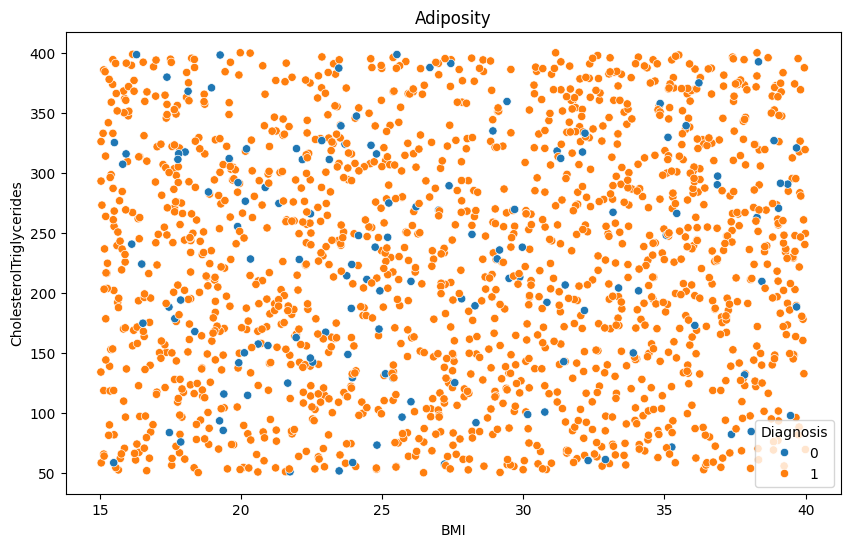

In [ ]:
fig, axes = plt.subplots(figsize=(10,6))
sns.scatterplot(data=df, x='BMI', y='CholesterolTriglycerides', hue='Diagnosis')
plt.title("Adiposity")
plt.show()

BMI and 'CholesterolTriglycerides' are not correlated in this population.

My hypothesis appears partially correct, with some markers of metabolic syndrome associated with CKD in this population.

---

# Hypothesis 2 - physical exercise is protective against CKD

I believe this hypothesis has already been shown to be false in my basic analysis of all the variables, via a KDE plot grouped by 'Diagnosis', in the ETL notebook.

---

# Hypothesis 3 - medical checkup frequency, medical adherence and health literacy are protective against CKD

Once, again, this hypothesis has been proven false above, using a KDE plot of 'HealthManagement', separated by 'Diagnosis'.

---

# Deeper Analysis with Plotly

I am interested in taking a closer look at CKD patients with either do or don't have a family history of kidney disease, and how this maps with Age, BMI, systolic blood pressure, fasting blood sugar, taking into account gender also.

First, I am looking at age.

In [70]:
# Filter
df_filtered = df.query("Diagnosis==1")

# Map Gender values to text labels
df_filtered["Gender"] = df_filtered["Gender"].map({0: "Male", 1: "Female"})


# Create box plot
fig = px.box(df_filtered, x="FamilyHistoryKidneyDisease", y="Age", points="all", facet_col="Gender")

# Change x-axis tick labels (example: rename categories)
fig.update_xaxes(
    ticktext=["No", "Yes"],  # new labels
    tickvals=df_filtered["FamilyHistoryKidneyDisease"].unique()  # original values
)
fig.show()

C:\Users\sonia\AppData\Local\Temp\ipykernel_27340\2970386963.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



I find that both family history and gender have no bearing on age in CKD patients. The median ages are very similar.

Next, I am looking at BMI.

In [71]:
# Filter
df_filtered = df.query("Diagnosis==1")

# Map Gender values to text labels
df_filtered["Gender"] = df_filtered["Gender"].map({0: "Male", 1: "Female"})

# Create box plot
fig = px.box(df_filtered, x="FamilyHistoryKidneyDisease", y="BMI", points="all", facet_col="Gender")

# Change x-axis tick labels (example: rename categories)
fig.update_xaxes(
    ticktext=["No", "Yes"],  # new labels
    tickvals=df_filtered["FamilyHistoryKidneyDisease"].unique()  # original values
)
fig.show()

C:\Users\sonia\AppData\Local\Temp\ipykernel_27340\2681899083.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



I find that the median BMI for male CKD patients with a family history of kidney disease is higher. The medians are very similar for females.

Next, I am looking at systolic blood pressure.

In [68]:
# Filter
df_filtered = df.query("Diagnosis==1")

# Map Gender values to text labels
df_filtered["Gender"] = df_filtered["Gender"].map({0: "Male", 1: "Female"})

# Create box plot
fig = px.box(df_filtered, x="FamilyHistoryKidneyDisease", y="SystolicBP", points="all", facet_col="Gender")

# Change x-axis tick labels (example: rename categories)
fig.update_xaxes(
    ticktext=["No", "Yes"],  # new labels
    tickvals=df_filtered["FamilyHistoryKidneyDisease"].unique()  # original values
)
fig.show()

C:\Users\sonia\AppData\Local\Temp\ipykernel_27340\3206171413.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The median systolic blood pressure for both males and females with a family history of kidney disease are lower; the decrease is more pronounced in females.

Lastly, I will look at fasting blood sugar levels.

In [72]:
# Filter
df_filtered = df.query("Diagnosis==1")

# Map Gender values to text labels
df_filtered["Gender"] = df_filtered["Gender"].map({0: "Male", 1: "Female"})

# Create box plot
fig = px.box(df_filtered, x="FamilyHistoryKidneyDisease", y="FastingBloodSugar", points="all", facet_col="Gender")

# Change x-axis tick labels (example: rename categories)
fig.update_xaxes(
    ticktext=["No", "Yes"],  # new labels
    tickvals=df_filtered["FamilyHistoryKidneyDisease"].unique()  # original values
)
fig.show()

C:\Users\sonia\AppData\Local\Temp\ipykernel_27340\3909998106.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The median fasting blood glucose levels for both males and females with a family history of kidney disease are lower; the decrease is more pronounced in females.

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
